# Classification of Faces

In this excercise, we try to classify images of : "Miranda_Cosgrove" "Chris_Martin" "Emma_Stone" "Jamie_Foxx" "Steve_Jobs" "Zac_Efron" "Sandra_Oh" "Taryn_Manning". The data is from a random sample of 8 persons of the OXFORD VGG Face dataset, more information here: http://www.robots.ox.ac.uk/~vgg/data/vgg_face/.

## Downloading of Data

You can download the data using the following code:

In [103]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

ImportError: cannot import name 'Model' from 'tensorflow.keras.layers' (C:\Users\Tobias\anaconda3\lib\site-packages\tensorflow\keras\layers\__init__.py)

In [3]:
# Downloading the data, if it does not exist, this will take some time... (>120MB)
import urllib
import os
if not os.path.isfile('8_faces_train_and_valid.hdf5'):
    urllib.request.urlretrieve("https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1","8_faces_train_and_valid.hdf5")
!ls -l 8_faces_train_and_valid.hdf5

Der Befehl "ls" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [4]:
import h5py
h5f_X = h5py.File('8_faces_train_and_valid.hdf5', 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces'].value
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces'].value
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces'].value
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces'].value
print(Y_valid.shape, X_valid.dtype)

['X_train_8_faces', 'X_valid_8_faces', 'Y_train_8_faces', 'Y_valid_8_faces']
(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,) float64


<ipython-input-4-cb1dfbb9d158>:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  X_train = h5f_X['X_train_8_faces'].value
<ipython-input-4-cb1dfbb9d158>:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  Y_train = h5f_X['Y_train_8_faces'].value
<ipython-input-4-cb1dfbb9d158>:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  X_valid = h5f_X['X_valid_8_faces'].value
<ipython-input-4-cb1dfbb9d158>:10: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  Y_valid = h5f_X['Y_valid_8_faces'].value


250


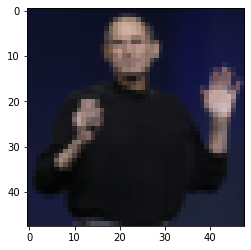

In [5]:
n = 0 #Miranda Cosgrove
n = 1 #Chris Martin (singer)
n = 2 #Emma Stone (actress)
n = 3 #Jamie Foxx (actor)
n = 4 #Steve Jobs (entrepreneur)
n = 5 #Zac Efron (actor)
n = 6 #Sandra Oh (actress)
n = 7 #Taryn Manning (actress)
n = 4 
idx=np.reshape(np.where(Y_train[0:len(Y_train)]==n),(250))
print(len(Y_train[idx]))
plt.imshow(np.asarray(X_train[idx][0],dtype="uint8"))

In [6]:
#Downloading the data, if it does not exist
if not os.path.isfile('8_faces_test.hdf5'):
  urllib.request.urlretrieve("https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1","8_faces_test.hdf5")
h5f_X = h5py.File('8_faces_test.hdf5', 'r')
print(list(h5f_X.keys()))
X_test = h5f_X['X_test_8_faces'].value
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces'].value
print(Y_test.shape)

['X_test_8_faces', 'Y_test_8_faces']
(400, 48, 48, 3)
(400,)


<ipython-input-6-fa69679b5ec8>:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  X_test = h5f_X['X_test_8_faces'].value
<ipython-input-6-fa69679b5ec8>:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  Y_test = h5f_X['Y_test_8_faces'].value


In [7]:
np.min(X_train),np.max(X_train),np.min(X_test),np.max(X_test)
X_train /= 255
X_valid /= 255
X_test /= 255

## a) Training an CNN from scratch

Train a model (as shown below) from scratch, using the training data for training and the validation data for validation. For all activations in the hidden layer use the 'ReLU', for the last layer use softmax. Use 3x3 convolutions and use padding = same.

* Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy. 
* Calculate the accuracy on the test set (you should reach an accuracy of about 0.54)
* Calculate the confusion matrix
* Have a look at missclassified examples

Image of the network:
https://github.com/ioskn/mldl_htwg/blob/master/uebungen/dl_cnn_faces_net.png

In [141]:

from tensorflow.python.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.regularizers as regularizers

model = Sequential()

model.add(Conv2D(15, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(15, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(30, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(30, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4,4)))

model.add(Flatten())
model.add(Dense(300))
model.add(Activation('softmax'))
model.add(Dropout(0.5))
model.add(Dense(8, input_shape=(8,), activation = "softmax",  activity_regularizer = regularizers.l2(.01)))

In [142]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, to_categorical(Y_train), batch_size=10, epochs=200, validation_data=(X_valid, to_categorical(Y_valid)), shuffle=True)

Epoch 1/200
200/200 [==============================] - 6s 29ms/step - loss: 2.0697 - accuracy: 0.1455 - val_loss: 2.0519 - val_accuracy: 0.2100
Epoch 2/200
200/200 [==============================] - 5s 24ms/step - loss: 2.0495 - accuracy: 0.1770 - val_loss: 2.0450 - val_accuracy: 0.1925
Epoch 3/200
200/200 [==============================] - 4s 22ms/step - loss: 2.0235 - accuracy: 0.1760 - val_loss: 2.0173 - val_accuracy: 0.2225
Epoch 4/200
200/200 [==============================] - 5s 25ms/step - loss: 2.0562 - accuracy: 0.1610 - val_loss: 2.0368 - val_accuracy: 0.2150
Epoch 5/200
200/200 [==============================] - 5s 23ms/step - loss: 2.0308 - accuracy: 0.1795 - val_loss: 2.0178 - val_accuracy: 0.2150
Epoch 6/200
200/200 [==============================] - 5s 26ms/step - loss: 2.0162 - accuracy: 0.1720 - val_loss: 2.0076 - val_accuracy: 0.2225
Epoch 7/200
200/200 [==============================] - 5s 23ms/step - loss: 2.0042 - accuracy: 0.1690 - val_loss: 2.0018 - val_accuracy:

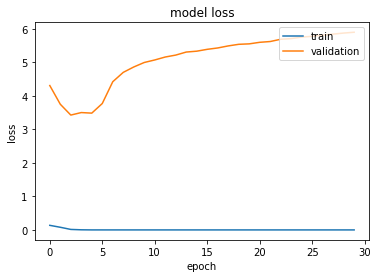

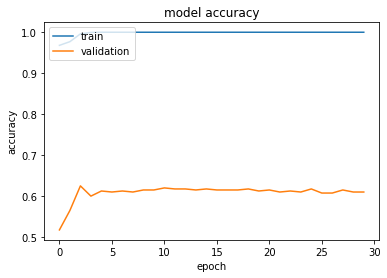

In [152]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [184]:
from sklearn.metrics import confusion_matrix
Y_pred = np.argmax(model.predict(X_test), axis = 1)
confusion_matrix(Y_test, Y_pred)

array([[36,  1,  4,  3,  0,  0,  5,  1],
       [ 0, 25,  5,  4,  5,  3,  3,  5],
       [ 1,  4, 38,  1,  0,  0,  0,  6],
       [ 0,  3,  2, 37,  0,  2,  2,  4],
       [ 0,  6,  0,  2, 40,  0,  0,  2],
       [ 1, 10,  4,  7,  0, 24,  1,  3],
       [ 1,  1,  3,  3,  0,  0, 37,  5],
       [ 2,  9,  4,  2,  2,  1,  1, 29]], dtype=int64)

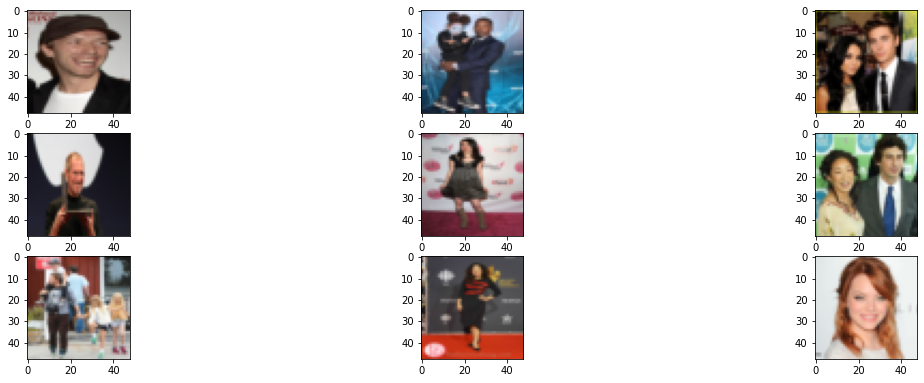

In [186]:
wrong = np.where(Y_test != Y_pred)[0]
index = np.random.choice(len(wrong), 9)
images = X_test[index]

fig = plt.figure(figsize = (20,20))

columns = 3
rows = 9

for i in range(rows):
  plt.subplot(rows,columns,i+1)
  plt.imshow(images[i])

## b) Training using transfer learning
In transfer learning you use an existing trained model with given weights trained on a different task. You then add a few layers yourself and only train them. The model you add should look like:

```
my_dense1 (Dense)            (None, 512)               262656    
_________________________________________________________________
my_dense2 (Dense)            (None, 512)               262656    
_________________________________________________________________
my_dense3 (Dense)            (None, 100)               51300     
_________________________________________________________________
my_dense4 (Dense)            (None, 8)                 808       
```

Use the following code as a starting point:

In [138]:
from tensorflow.keras.applications import VGG16
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False,input_shape = (img_width, img_height, 3))

In [145]:
fc1 = base_model.output
fc1 = Flatten()(fc1)

fc1 = Dense(512, activation = "relu", name = "my_dense1")(fc1)
fc1 = Dense(512, activation = "relu", name = "my_dense2")(fc1)
fc1 = Dense(100, activation = "relu", name = "my_dense3")(fc1)
fc1 = Dense(8,activation='softmax', name='my_dense4')(fc1)

model_trans = tf.compat.v1.keras.Model(base_model.input, fc1) #Current hack for TF 2.0 and keras

In [140]:
#base_model.summary()
for layer in model_trans.layers:
  name = layer.name
  if name.startswith('my'):
    layer.trainable = True
    print(name)
  else:
    layer.trainable = False

my_dense1
my_dense2
my_dense3
my_dense4


In [148]:
model_trans.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_trans.fit(X_train, to_categorical(Y_train), batch_size=10, epochs=30, validation_data=(X_valid, to_categorical(Y_valid)), shuffle=True)

Epoch 1/30
200/200 [==============================] - 15s 73ms/step - loss: 0.1367 - accuracy: 0.9680 - val_loss: 4.3115 - val_accuracy: 0.5175
Epoch 2/30
200/200 [==============================] - 14s 71ms/step - loss: 0.0791 - accuracy: 0.9770 - val_loss: 3.7535 - val_accuracy: 0.5650
Epoch 3/30
200/200 [==============================] - 14s 72ms/step - loss: 0.0146 - accuracy: 0.9960 - val_loss: 3.4298 - val_accuracy: 0.6250
Epoch 4/30
200/200 [==============================] - 15s 73ms/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 3.5046 - val_accuracy: 0.6000
Epoch 5/30
200/200 [==============================] - 15s 74ms/step - loss: 1.8106e-04 - accuracy: 1.0000 - val_loss: 3.4877 - val_accuracy: 0.6125
Epoch 6/30
200/200 [==============================] - 14s 72ms/step - loss: 5.9690e-05 - accuracy: 1.0000 - val_loss: 3.7748 - val_accuracy: 0.6100
Epoch 7/30
200/200 [==============================] - 14s 72ms/step - loss: 1.3352e-05 - accuracy: 1.0000 - val_loss: 4.4256 - v

Do the same analysis as in a) above. You should get an accuracy of approx 0.61

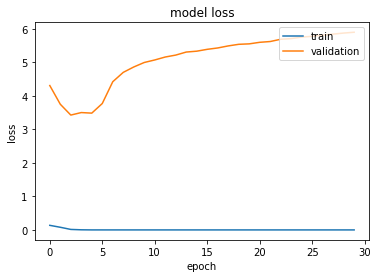

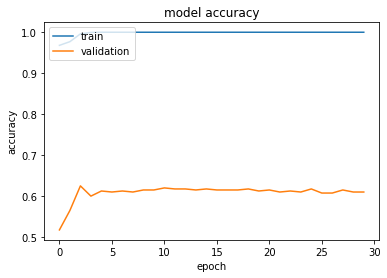

In [151]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [187]:
from sklearn.metrics import confusion_matrix
Y_pred = np.argmax(model_trans.predict(X_test), axis = 1)
confusion_matrix(Y_test, Y_pred)

array([[33,  3,  2,  0,  0,  3,  3,  6],
       [ 2, 23,  2,  8,  4,  4,  3,  4],
       [ 0,  4, 35,  1,  0,  5,  3,  2],
       [ 1,  4,  2, 24,  4,  5,  3,  7],
       [ 0,  7,  0,  0, 41,  0,  0,  2],
       [ 3,  6,  2,  5,  1, 29,  2,  2],
       [ 5,  2,  0,  2,  0,  2, 36,  3],
       [ 5,  2,  3,  1,  0,  1,  6, 32]], dtype=int64)

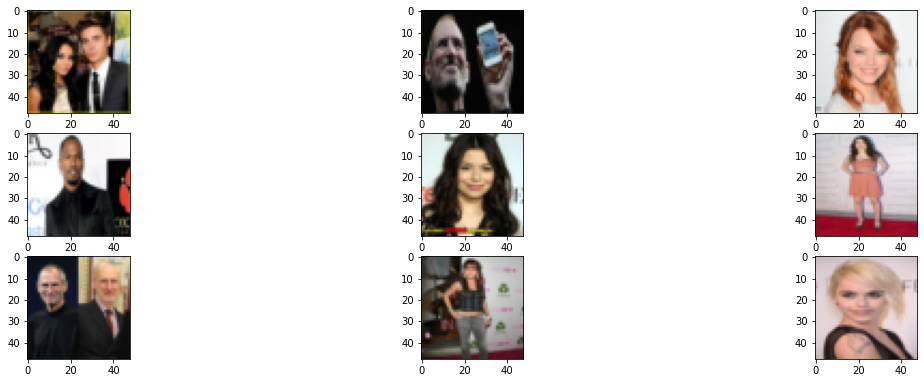

In [188]:
wrong = np.where(Y_test != Y_pred)[0]
index = np.random.choice(len(wrong), 9)
images = X_test[index]

fig = plt.figure(figsize = (20,20))

columns = 3
rows = 9

for i in range(rows):
  plt.subplot(rows,columns,i+1)
  plt.imshow(images[i])

## c) Try to get better.

Ideas: use dropout and other tricks to prevent overfitting. Try to learn some convulutional layers as well.

In [195]:
fc2 = base_model.output
fc2 = Flatten()(fc2)

fc2 = Dense(512, activation = "relu", name = "my_dense1")(fc2)
fc2 = Dropout(0.5)(fc2)
fc2 = Dense(512, activation = "relu", name = "my_dense2")(fc2)
fc2 = Dropout(0.5)(fc2)
fc2 = Dense(100, activation = "relu", name = "my_dense3")(fc2)
fc2 = Dropout(0.5)(fc2)
fc2 = Dense(8,activation='softmax', name='my_dense4')(fc2)

model_improved = tf.compat.v1.keras.Model(base_model.input, fc2) #Current hack for TF 2.0 and keras

for layer in model_improved.layers:
  name = layer.name
  if name.startswith('my'):
    layer.trainable = True
    print(name)
  else:
    layer.trainable = False

model_improved.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_improved.fit(X_train, to_categorical(Y_train), batch_size=10, epochs=10, validation_data=(X_valid, to_categorical(Y_valid)), shuffle=True)

my_dense1
my_dense2
my_dense3
my_dense4
Epoch 1/10
200/200 [==============================] - 19s 96ms/step - loss: 2.0769 - accuracy: 0.2060 - val_loss: 1.8416 - val_accuracy: 0.3275
Epoch 2/10
200/200 [==============================] - 17s 86ms/step - loss: 1.8568 - accuracy: 0.2785 - val_loss: 1.6636 - val_accuracy: 0.3975
Epoch 3/10
200/200 [==============================] - 16s 78ms/step - loss: 1.7091 - accuracy: 0.3605 - val_loss: 1.5564 - val_accuracy: 0.4700
Epoch 4/10
200/200 [==============================] - 15s 75ms/step - loss: 1.6153 - accuracy: 0.3975 - val_loss: 1.4684 - val_accuracy: 0.4400
Epoch 5/10
200/200 [==============================] - 16s 78ms/step - loss: 1.5096 - accuracy: 0.4395 - val_loss: 1.4442 - val_accuracy: 0.4825
Epoch 6/10
200/200 [==============================] - 16s 81ms/step - loss: 1.4472 - accuracy: 0.4905 - val_loss: 1.3593 - val_accuracy: 0.5025
Epoch 7/10
200/200 [==============================] - 17s 83ms/step - loss: 1.3543 - accuracy: 0

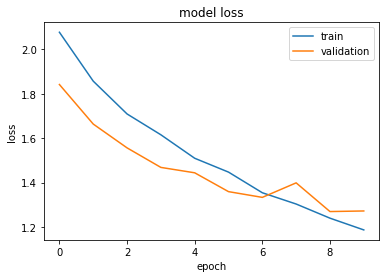

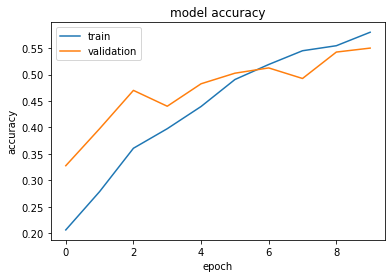

In [196]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()